In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = {'size'   : 20}
mpl.rc('font', **font)

In [21]:
#base_dir = "/Users/artur/Work/LLR/HGCAL/HGCROC/data/v2_data/data_Flip_ROC2/shaper_vref_scan/run_20191001_155828/"
#base_dir = "/Users/artur/Work/LLR/HGCAL/HGCROC/data/v2_data/data_Flip_ROC2/shaper_vref_scan/run_20191002_115020/"
base_dir = "/Users/artur/Work/LLR/HGCAL/HGCROC/data/hgcroc_v2/shaper_vref_scan/run_20191010_231301/"
fname = base_dir + "/dataframe.h5" # inv Vref at ff

In [22]:
%%time
df_chans = pd.read_hdf(fname)

CPU times: user 44.2 ms, sys: 62.6 ms, total: 107 ms
Wall time: 141 ms


In [23]:
df_chans.head()

event  bx  wadd  channel ch_type  adc  toa  tot  df_id  VrefInv  VrefNoInv
0      1   0   269        0  normal  244    0    0      0    200.0        0.0
1      1   0   269       21  normal  242    0    0      0    200.0        0.0
2      1   0   269       22  normal  251    0    0      0    200.0        0.0
3      1   0   269       23  normal  274    0    0      0    200.0        0.0
4      1   0   269       24  normal  249    0    0      0    200.0        0.0

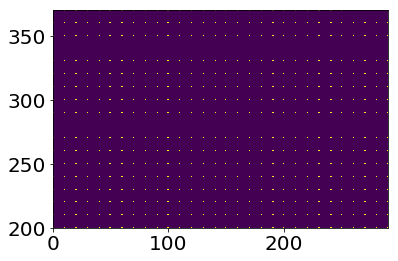

In [24]:
r = plt.hist2d(df_chans.VrefNoInv, df_chans.VrefInv, 255)

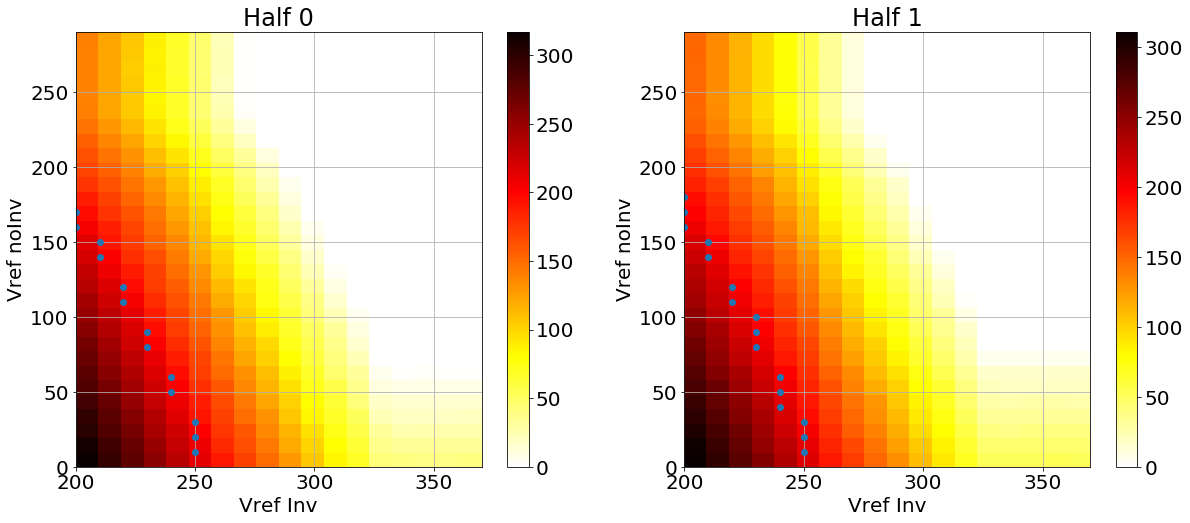

In [28]:
fig, axs = plt.subplots(1,2,figsize = (20,8))

for i in range(2):
    ax = axs[i]

    if i == 0:
        sel = df_chans.channel < 39
    elif i == 1:
        sel = df_chans.channel > 38
        
    df_sel = df_chans[sel]

    adc_vs_vref = df_sel.groupby(["VrefInv","VrefNoInv"])["adc"].max().reset_index()

    bins1 = len(adc_vs_vref.VrefInv.unique())
    bins2 = len(adc_vs_vref.VrefNoInv.unique())

    x = adc_vs_vref.VrefInv
    y = adc_vs_vref.VrefNoInv
    z = adc_vs_vref.adc
    #z = np.log(adc_vs_vref.adc)

    r = ax.hist2d(x,y, weights = z, 
                   bins = (bins1,bins2), cmap = "hot_r")

    sel = abs(adc_vs_vref.adc - 200) < 10
    ax.plot(x[sel], y[sel], "o")
    
    plt.colorbar(r[3], ax = ax)
    ax.set_title("Half %i" %i)    

for ax in axs:
    ax.set_xlabel("Vref Inv")
    ax.set_ylabel("Vref noInv")

    ax.grid()

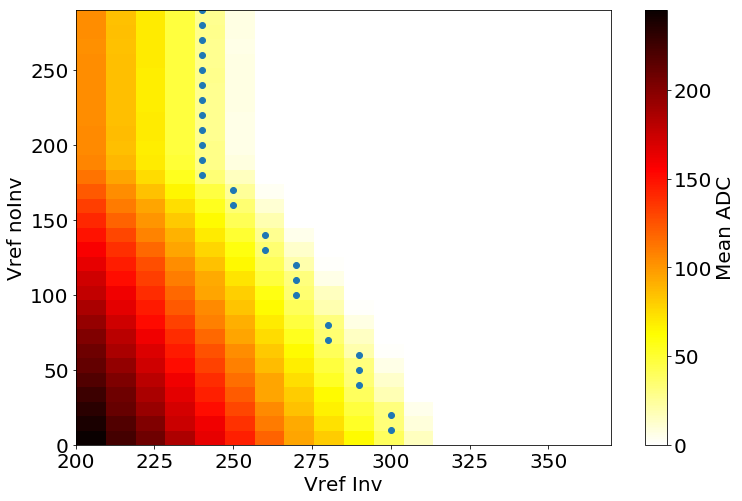

In [39]:
plt.figure(figsize = (12,8))

sel = df_chans.channel == 10
#sel = df_chans.channel > 39

df_sel = df_chans[sel]

adc_vs_vref = df_sel.groupby(["VrefInv","VrefNoInv"])["adc"].median().reset_index()

bins1 = len(adc_vs_vref.VrefInv.unique())
bins2 = len(adc_vs_vref.VrefNoInv.unique())

x = adc_vs_vref.VrefInv #- adc_vs_vref.VrefNoInv
y = adc_vs_vref.VrefNoInv
z = adc_vs_vref.adc

r = plt.hist2d(x,y, weights = z, 
               bins = (bins1,bins2), cmap = "hot_r")

sel = abs(adc_vs_vref.adc - 30) < 10
plt.plot(x[sel], y[sel], "o")

plt.xlabel("Vref Inv")
plt.ylabel("Vref noInv")

plt.colorbar(label = "Mean ADC")

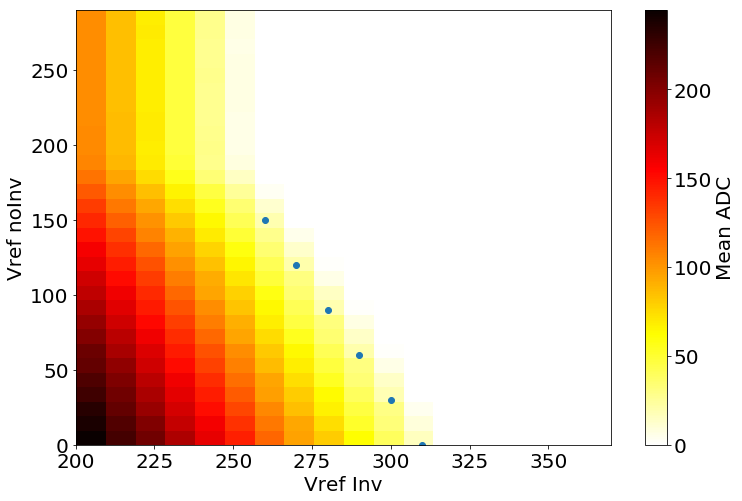

In [30]:
plt.figure(figsize = (12,8))

sel = df_chans.channel == 10
#sel = df_chans.channel > 39

df_sel = df_chans[sel]

adc_vs_vref = df_sel.groupby(["VrefInv","VrefNoInv"])["adc"].mean().reset_index()

bins1 = len(adc_vs_vref.VrefInv.unique())
bins2 = len(adc_vs_vref.VrefNoInv.unique())

x = adc_vs_vref.VrefInv #- adc_vs_vref.VrefNoInv
y = adc_vs_vref.VrefNoInv
z = adc_vs_vref.adc

r = plt.hist2d(x,y, weights = z, 
               bins = (bins1,bins2), cmap = "hot_r")

sel = abs(adc_vs_vref.adc - 20) < 5
plt.plot(x[sel], y[sel], "o")

plt.xlabel("Vref Inv")
plt.ylabel("Vref noInv")

plt.colorbar(label = "Mean ADC")

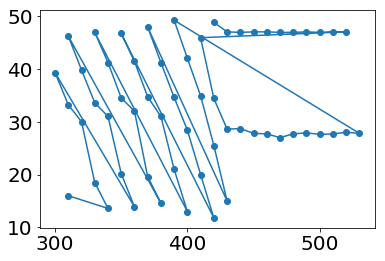

In [31]:
sel = abs(z - 30) < 20
sel &= x > 50
#sel &= z > 0
plt.plot((y+x)[sel], z[sel], "o-")

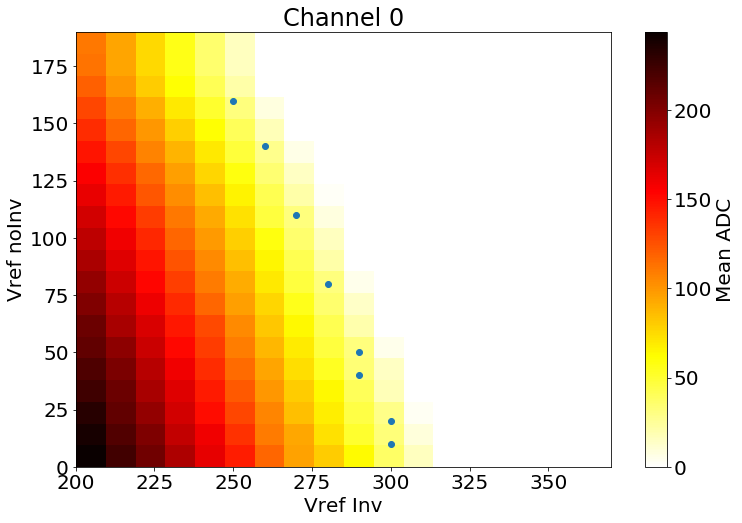

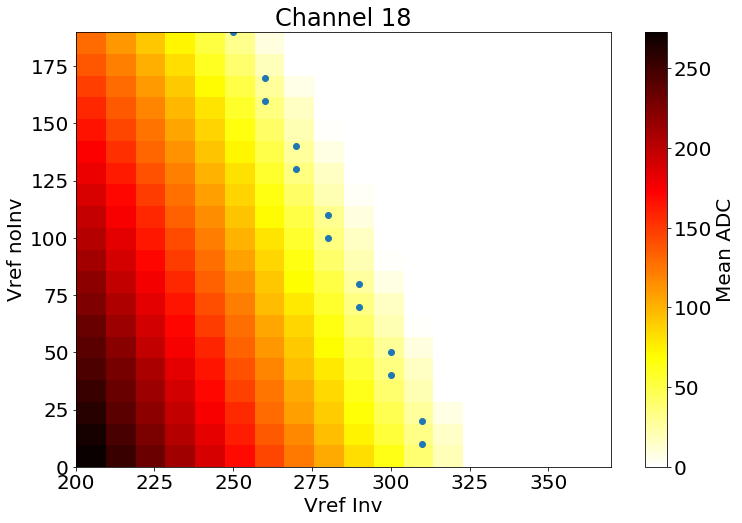

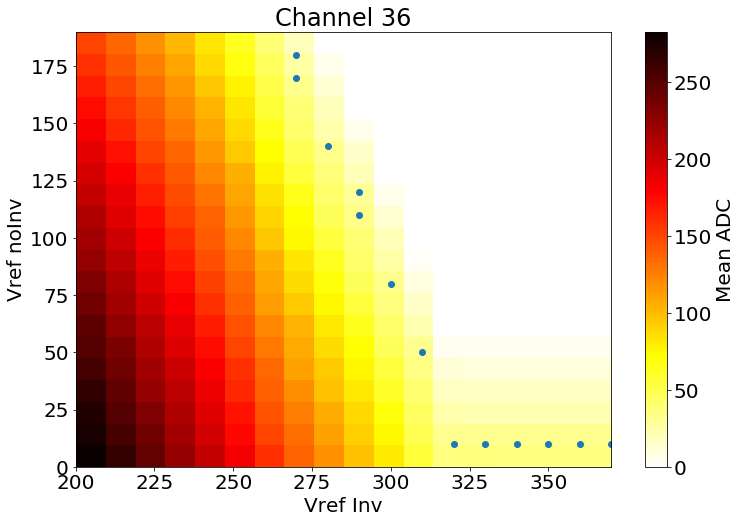

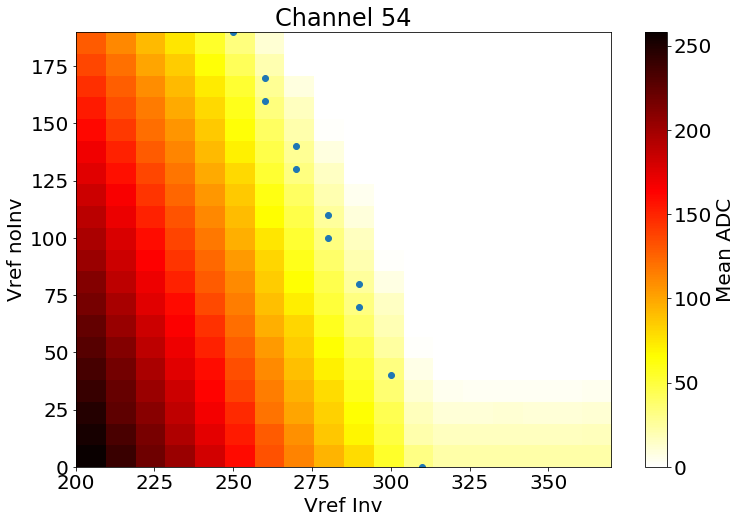

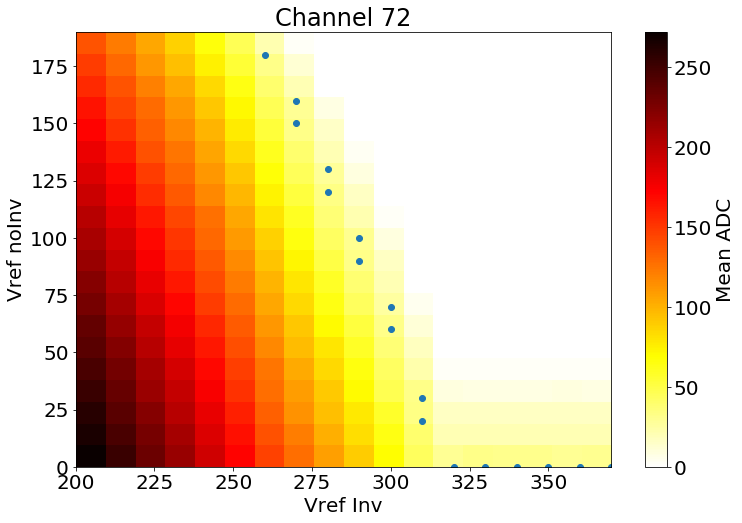

In [32]:
for chan in range(0,78,18):

    plt.figure(figsize = (12,8))
    plt.title("Channel %i" %chan)

    sel = df_chans.channel == chan
    sel &= df_chans.VrefNoInv < 200
    
    df_sel = df_chans[sel]

    adc_vs_vref = df_sel.groupby(["VrefInv","VrefNoInv"])["adc"].mean().reset_index()

    bins1 = len(adc_vs_vref.VrefInv.unique())
    bins2 = len(adc_vs_vref.VrefNoInv.unique())

    x = adc_vs_vref.VrefInv
    y = adc_vs_vref.VrefNoInv
    z = adc_vs_vref.adc
    
    r = plt.hist2d(x,y, weights = z, 
                   bins = (bins1,bins2), cmap = "hot_r")

    sel = abs(adc_vs_vref.adc - 30) < 5
    plt.plot(x[sel], y[sel], "o")

    plt.xlabel("Vref Inv")
    plt.ylabel("Vref noInv")

    plt.colorbar(label = "Mean ADC")

In [33]:
df_chans.VrefInv.unique()

array([200., 210., 220., 230., 240., 250., 260., 270., 280., 290., 300.,
       310., 320., 330., 340., 350., 360., 370.])

In [34]:
df_chans.VrefNoInv.unique()

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290.])

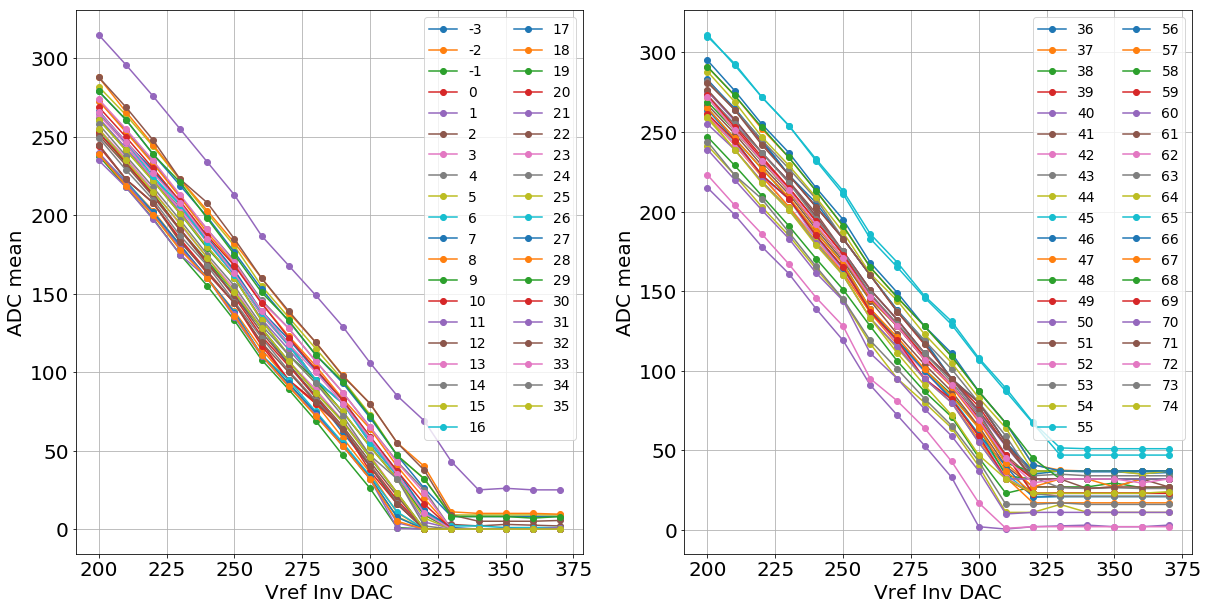

In [48]:
fig, axs = plt.subplots(1,2,figsize = (20,10))

chans = sorted(df_chans.channel.unique())
#chans = range(0,72,1)

for chan in chans:
    #if chan > 35: chan += 3
    sel = df_chans.channel == chan
    sel &= df_chans.VrefNoInv == 0
    df_sel = df_chans[sel]

    # profile
    prof = df_sel.groupby("VrefInv")["adc"].median()
    x = prof.index
    y = prof.values

    ped = 0
    
    ax = axs[(chan+3)//39]
    ax.plot(x,y - ped,"o-", label = chan)
    
for ax in axs:
    ax.legend(ncol = 2, fontsize = "x-small")
    ax.set_xlabel("Vref Inv DAC")
    ax.set_ylabel("ADC mean")
    ax.grid()

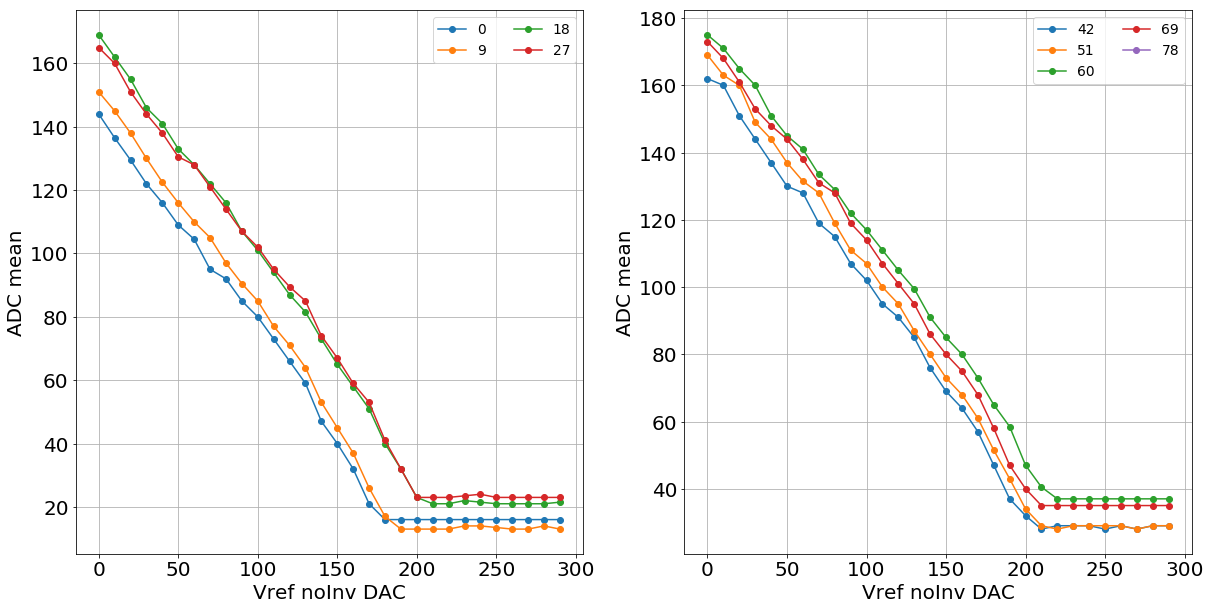

In [36]:
fig, axs = plt.subplots(1,2,figsize = (20,10))

for i in range(2):
    ax = axs[i]
    chans = range(0,36,9) if i == 0 else range(39,78,9)
    
    for chan in chans:
        if chan > 35: chan += 3
        sel = df_chans.channel == chan
        sel &= df_chans.VrefInv == 250
        df_sel = df_chans[sel]

        # profile
        prof = df_sel.groupby("VrefNoInv")["adc"].median()
        x = prof.index
        y = prof.values

        ax.plot(x,y,"o-", label = chan)
    
for ax in axs:
    ax.legend(ncol = 2, fontsize = "x-small")
    ax.set_xlabel("Vref noInv DAC")
    ax.set_ylabel("ADC mean")
    ax.grid()

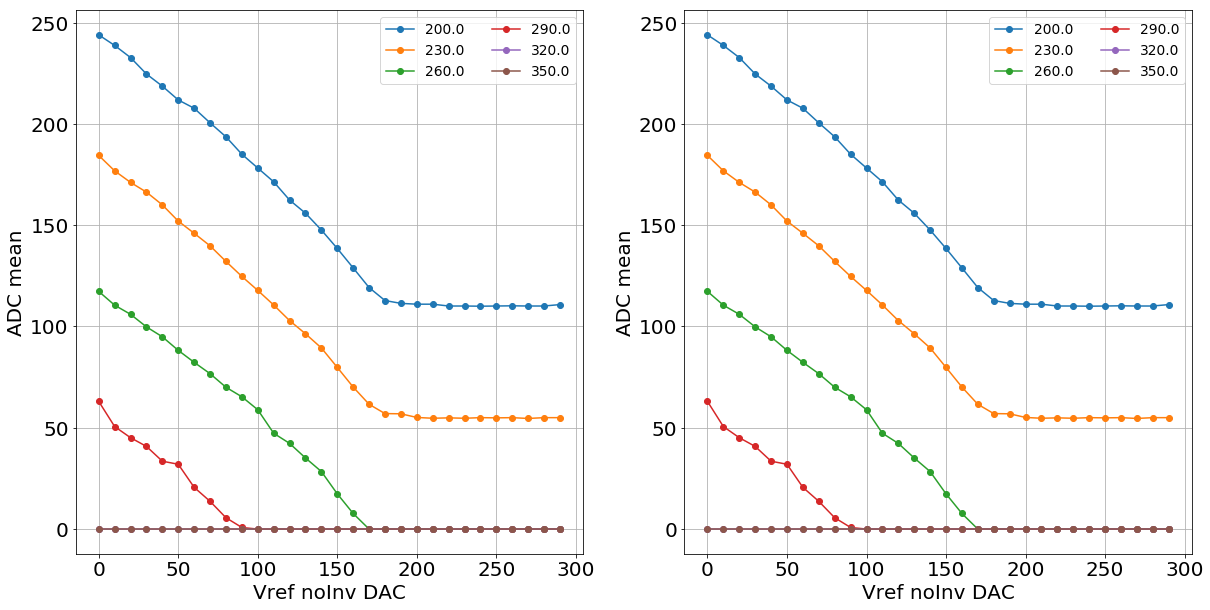

In [41]:
fig, axs = plt.subplots(1,2,figsize = (20,10))

chan = 0

vrefs = df_chans.VrefInv.unique()[::3]

for i in range(2):
    ax = axs[i]

    for vref in vrefs:

        if chan > 35: chan += 3
        sel = df_chans.channel == chan
        sel &= df_chans.VrefInv == vref
        df_sel = df_chans[sel]

        # profile
        prof = df_sel.groupby("VrefNoInv")["adc"].mean()
        x = prof.index
        y = prof.values

        ped = 0
        ax.plot(x,y - ped,"o-", label = vref)
    
for ax in axs:
    ax.legend(ncol = 2, fontsize = "x-small")
    ax.set_xlabel("Vref noInv DAC")
    ax.set_ylabel("ADC mean")
    ax.grid()